<a href="https://colab.research.google.com/github/rameshkumark24/Stockmarketfutureprediction/blob/main/SpamEmailPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("uciml/sms-spam-collection-dataset")

print("Path to dataset files:", path)

100%|██████████| 211k/211k [00:00<00:00, 28.7MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/uciml/sms-spam-collection-dataset/versions/1


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Step 1: Load the dataset
dataset_path = "/root/.cache/kagglehub/datasets/uciml/sms-spam-collection-dataset/versions/1/spam.csv"
data = pd.read_csv(dataset_path, encoding='latin-1')

# Inspect the dataset
print(data.head())

# Step 2: Preprocess the data
# The dataset contains extra columns; we'll drop them
data = data[['v1', 'v2']]  # v1 = labels (ham/spam), v2 = messages

# Convert labels to binary: ham -> 0, spam -> 1
data['v1'] = data['v1'].map({'ham': 0, 'spam': 1})

# Step 3: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data['v2'], data['v1'], test_size=0.2, random_state=42)

# Step 4: Text Vectorization using TF-IDF
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Step 5: Model Training and Evaluation
# Naive Bayes Model
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)
y_pred_nb = nb_model.predict(X_test_tfidf)
print("Naive Bayes Classification Report:")
print(classification_report(y_test, y_pred_nb))

# Logistic Regression Model
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_tfidf, y_train)
y_pred_lr = lr_model.predict(X_test_tfidf)
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lr))

# Support Vector Machine Model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_tfidf, y_train)
y_pred_svm = svm_model.predict(X_test_tfidf)
print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))

# Step 6: Model Performance Evaluation (Accuracy)
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))


     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  
Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       965
           1       1.00      0.79      0.88       150

    accuracy                           0.97      1115
   macro avg       0.98      0.90      0.93      1115
weighted avg       0.97      0.97      0.97      1115

Logistic Regression Classification Report:


<ipython-input-28-7d620d99743c>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='v1', palette="Set2")


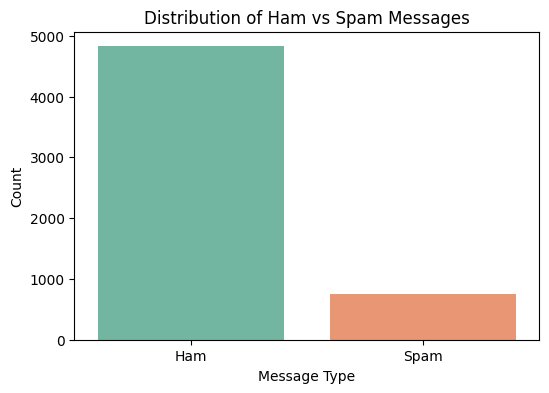

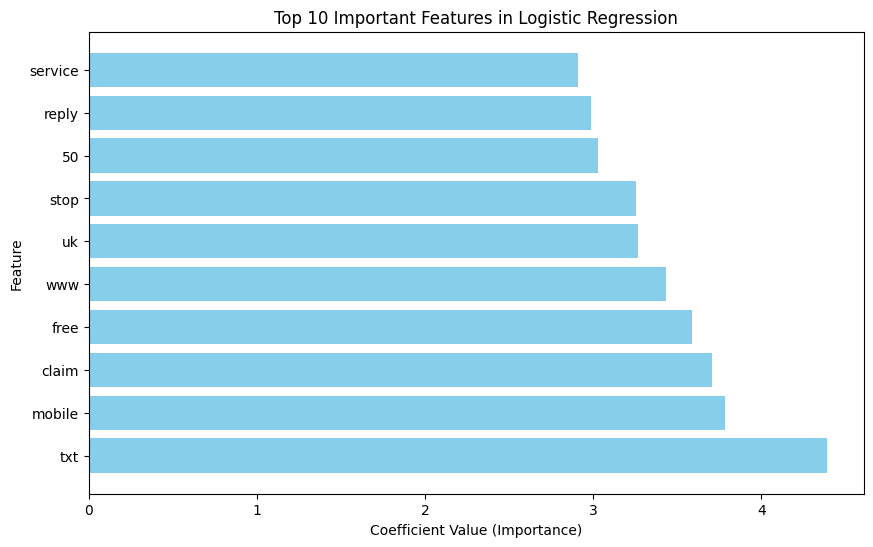

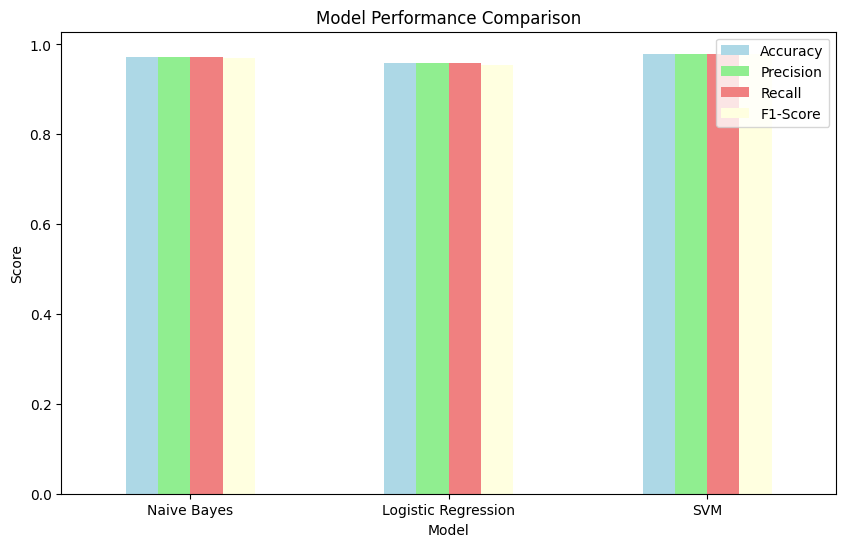

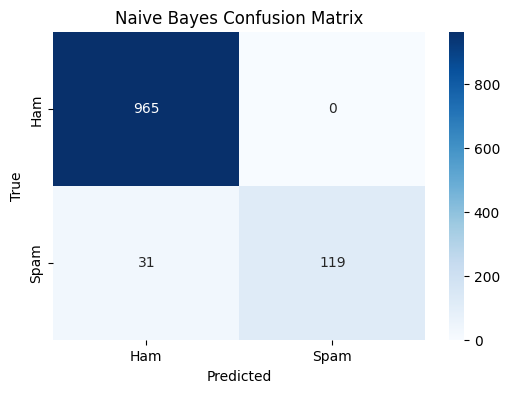

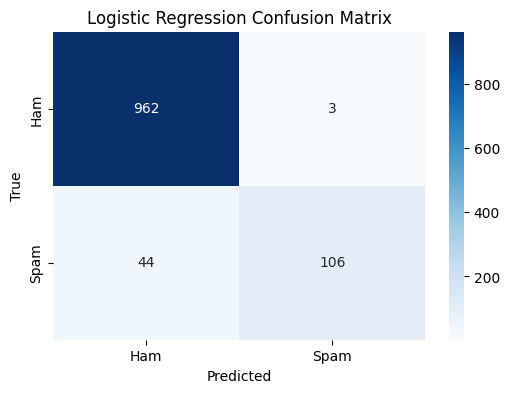

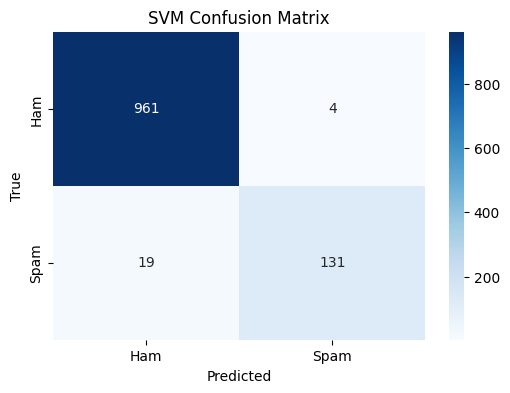

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# 1. Distribution of Labels (Ham vs Spam)
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='v1', palette="Set2")
plt.title('Distribution of Ham vs Spam Messages')
plt.xticks(ticks=[0, 1], labels=['Ham', 'Spam'])
plt.xlabel('Message Type')
plt.ylabel('Count')
plt.show()

# Get the feature names from TF-IDF
feature_names = tfidf.get_feature_names_out()

# Get the most important features based on the coefficients of Logistic Regression
coef = lr_model.coef_.flatten()  # No need for .toarray()
top_features = sorted(zip(coef, feature_names), reverse=True)[:10]  # Top 10 features

# Plot top 10 features
top_features_names = [x[1] for x in top_features]
top_features_scores = [x[0] for x in top_features]

plt.figure(figsize=(10, 6))
plt.barh(top_features_names, top_features_scores, color='skyblue')
plt.title('Top 10 Important Features in Logistic Regression')
plt.xlabel('Coefficient Value (Importance)')
plt.ylabel('Feature')
plt.show()


# 3. Model Performance Comparison (Accuracy, Precision, Recall, F1-Score)
models = ['Naive Bayes', 'Logistic Regression', 'SVM']
accuracies = [accuracy_score(y_test, y_pred_nb), accuracy_score(y_test, y_pred_lr), accuracy_score(y_test, y_pred_svm)]
precision = [classification_report(y_test, y_pred_nb, output_dict=True)['accuracy'],
             classification_report(y_test, y_pred_lr, output_dict=True)['accuracy'],
             classification_report(y_test, y_pred_svm, output_dict=True)['accuracy']]
recall = [classification_report(y_test, y_pred_nb, output_dict=True)['weighted avg']['recall'],
          classification_report(y_test, y_pred_lr, output_dict=True)['weighted avg']['recall'],
          classification_report(y_test, y_pred_svm, output_dict=True)['weighted avg']['recall']]
f1 = [classification_report(y_test, y_pred_nb, output_dict=True)['weighted avg']['f1-score'],
      classification_report(y_test, y_pred_lr, output_dict=True)['weighted avg']['f1-score'],
      classification_report(y_test, y_pred_svm, output_dict=True)['weighted avg']['f1-score']]

# Create a DataFrame for easy visualization
model_comparison = pd.DataFrame({
    'Model': models,
    'Accuracy': accuracies,
    'Precision': precision,
    'Recall': recall,
    'F1-Score': f1
})

# Plot the performance comparison
model_comparison.set_index('Model').plot(kind='bar', figsize=(10, 6), color=['lightblue', 'lightgreen', 'lightcoral', 'lightyellow'])
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.show()

# 4. Confusion Matrix Visualization
# For Naive Bayes
cm_nb = confusion_matrix(y_test, y_pred_nb)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.title('Naive Bayes Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# For Logistic Regression
cm_lr = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# For SVM
cm_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
